## <strong>4.2 Prepare the data for modeling </strong>

#### <strong>Import the necessary libraries</strong>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

#### **Read data product**

In [6]:
df_products = pd.read_csv('../../data/processed/tiki_data.csv')
df_products.head()

,p_id,p_name,p_categories,p_id_shop,p_shop_name,p_brand,p_day_created,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
0,83412126,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,Bình giữ nhiệt,38510.0,JoyMall LocknLock Chính Hãng,LocknLock,659.0,702,528000,269000,49
1,53789448,"Bộ cây lau nhà tự vắt thông minh, chổi lau nhà...",Nhà Cửa - Đời Sống,96639.0,Parroti Store,Parroti,974.0,12844,799000,429000,46
2,13334313,Bộ 6 chén (bát) cơm sứ phong cách Nhật Bản hoa...,Nhà Cửa - Đời Sống,3340.0,Công ty TNHH TM Minh Gia Lợi,OEM,1372.0,938,209000,209000,0
3,99868980,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,Bình giữ nhiệt,1.0,Tiki Trading,LocknLock,593.0,10359,473000,235000,50
4,115092053,Bộ ga giường poly cotton LIDACO drap giường đ...,Bộ ga,43482.0,Lidaco Official Store,LIDACO,529.0,2338,106000,89000,16


#### **Create pairplot to see the distribution of the data**
&#9889; **Note:** The pairplot shows that the data is not normally distributed
- **Example:** The distribution of the data for the feature **`p_discount_rate`** and **`p_sold_quantity`**. When discount rate hight, the sold quantity is so hight.

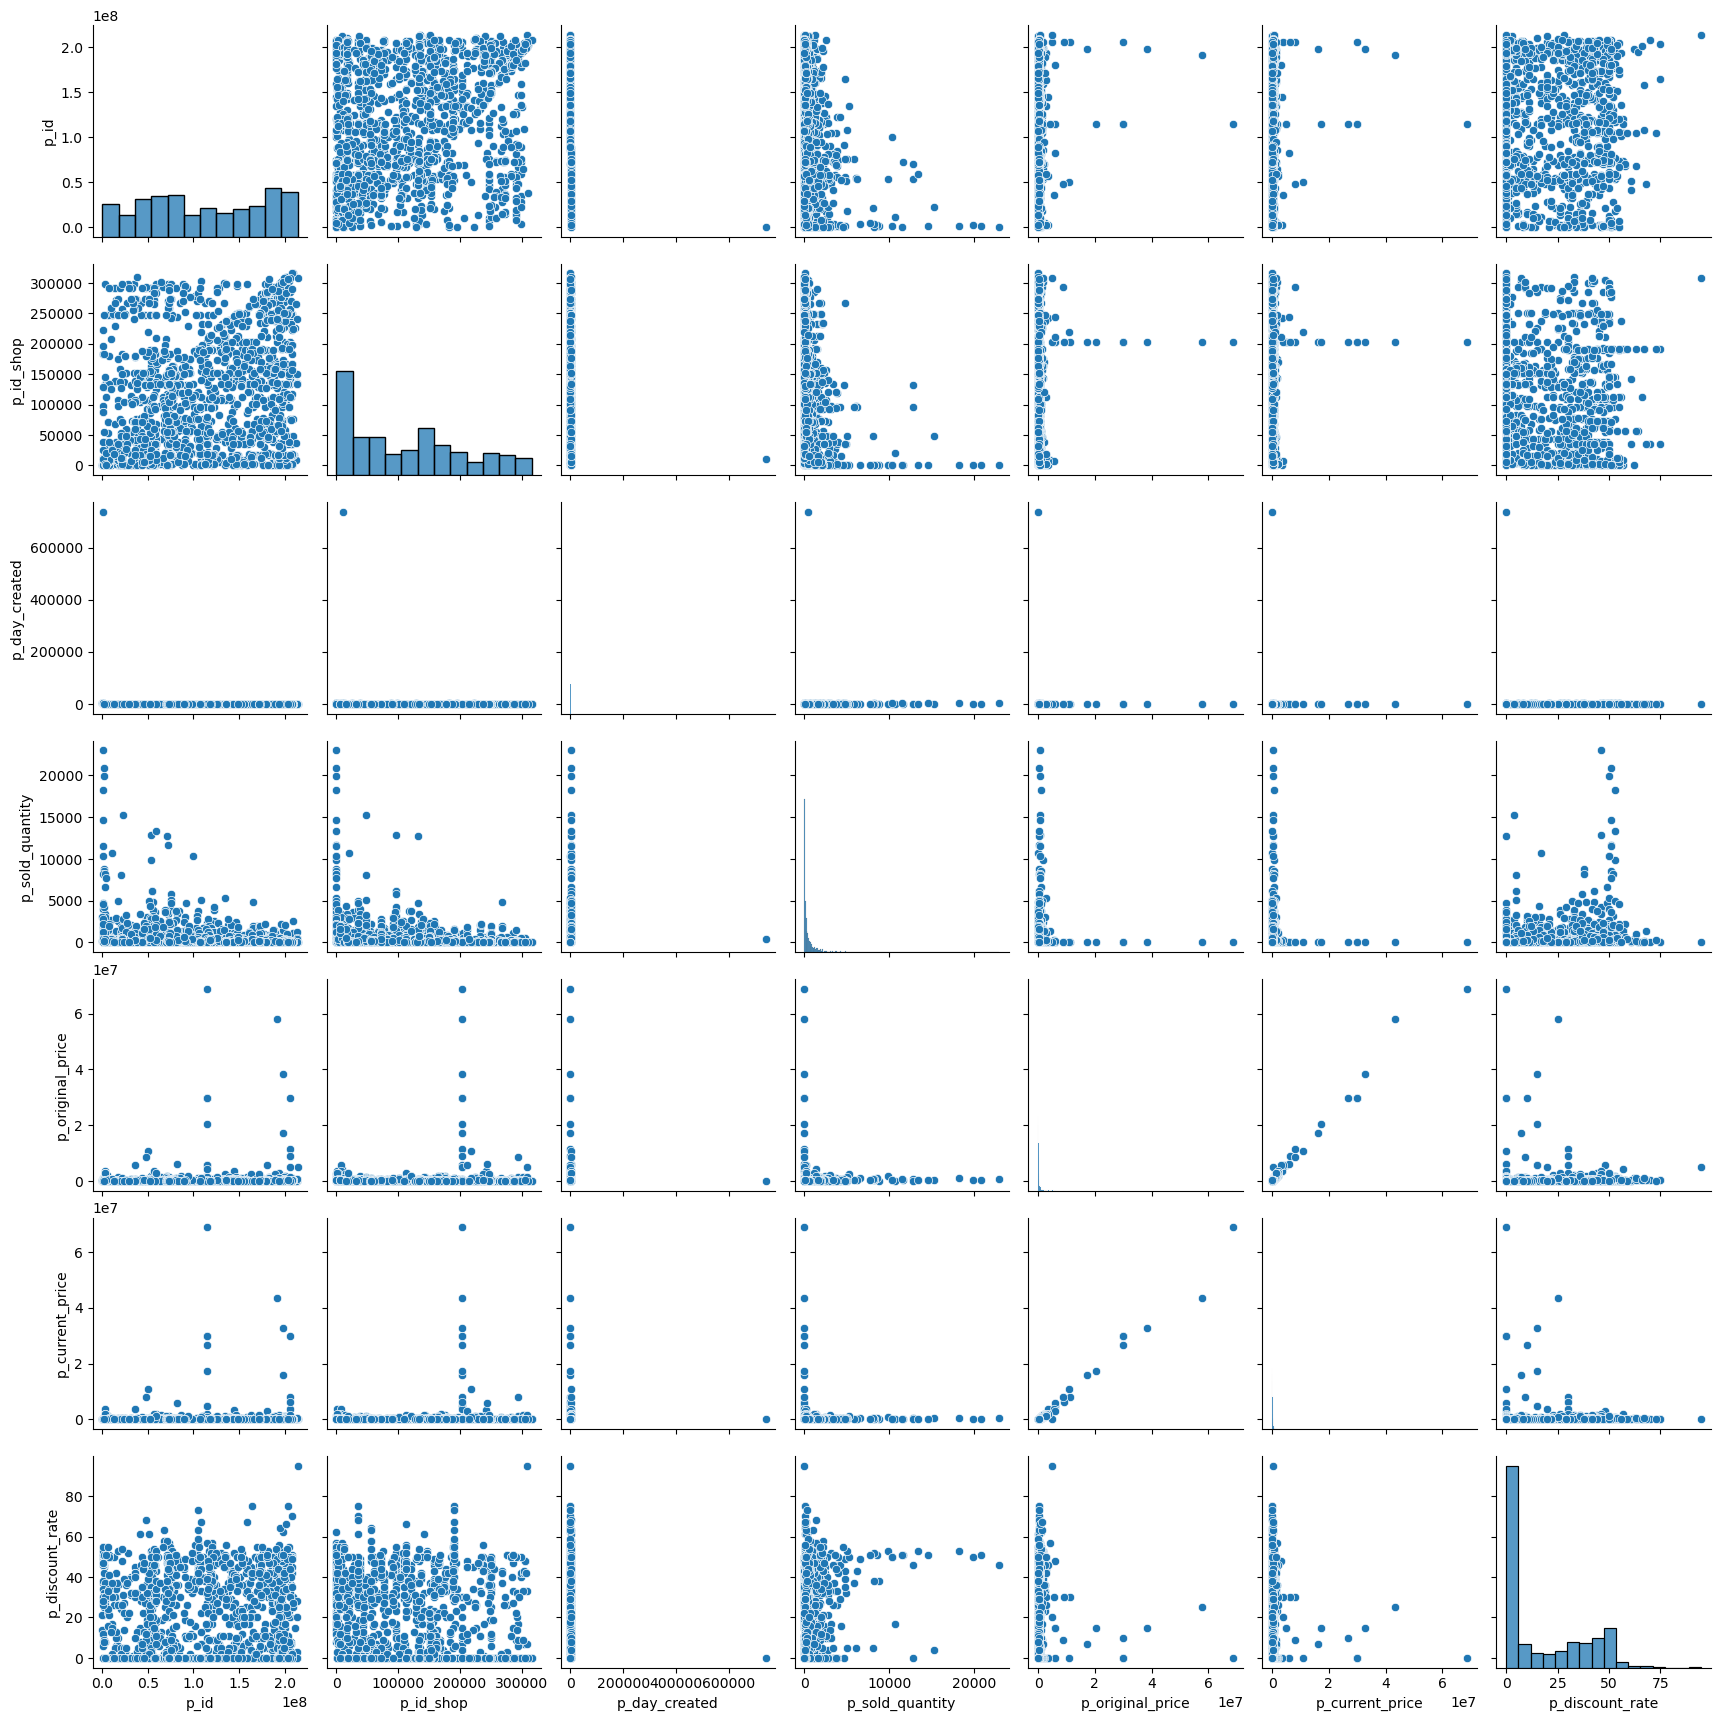

In [7]:
sns.pairplot(df_products)
plt.show()

#### **Copy data frame to new data frame**

In [8]:
df_products_copy = df_products.copy()

#### **Encode features to numeric values (Purpose: to increase the usability of the data especially in different systems)**

In [9]:
# use label encoder to encode the categorical variables
le = LabelEncoder()
cols_to_endcode = ['p_categories', 'p_brand']
df_products_copy[cols_to_endcode] = df_products_copy[cols_to_endcode].apply(le.fit_transform)
df_products_copy.head()

,p_id,p_name,p_categories,p_id_shop,p_shop_name,p_brand,p_day_created,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
0,83412126,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,7,38510.0,JoyMall LocknLock Chính Hãng,155,659.0,702,528000,269000,49
1,53789448,"Bộ cây lau nhà tự vắt thông minh, chổi lau nhà...",84,96639.0,Parroti Store,198,974.0,12844,799000,429000,46
2,13334313,Bộ 6 chén (bát) cơm sứ phong cách Nhật Bản hoa...,84,3340.0,Công ty TNHH TM Minh Gia Lợi,192,1372.0,938,209000,209000,0
3,99868980,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,7,1.0,Tiki Trading,155,593.0,10359,473000,235000,50
4,115092053,Bộ ga giường poly cotton LIDACO drap giường đ...,15,43482.0,Lidaco Official Store,145,529.0,2338,106000,89000,16


In [10]:
# drop the columns that are not needed for the model
canomical_data = df_products_copy.drop(['p_id','p_name', 'p_id_shop', 'p_shop_name', 'p_current_price'], axis=1)
canomical_data.head()

,p_categories,p_brand,p_day_created,p_sold_quantity,p_original_price,p_discount_rate
0,7,155,659.0,702,528000,49
1,84,198,974.0,12844,799000,46
2,84,192,1372.0,938,209000,0
3,7,155,593.0,10359,473000,50
4,15,145,529.0,2338,106000,16


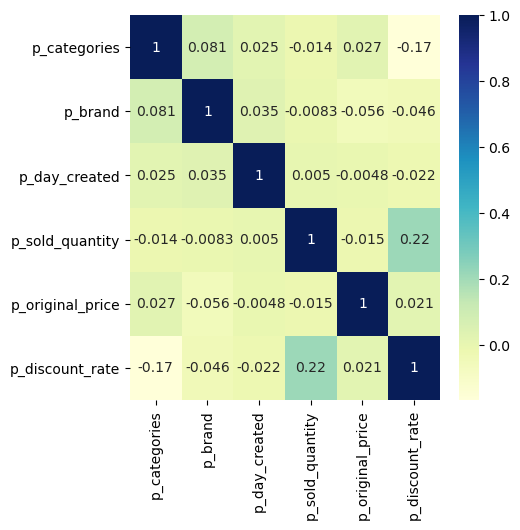

In [11]:
# Correlation using heatmap
plt.figure(figsize = (5,5))
sns.heatmap(canomical_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

&#9889; **<font color="yellow">Conclusion:</font>** From Heatmap, we can see that the correlation between the features is not high. So, we can use all features to build the model.

In [12]:
# write the canomical data to a csv file
canomical_data.to_csv('../../data/processed/canomical_data.csv', index=False)

## <strong>4.3 Use model to calculate feature importance </strong>

In [13]:
X = canomical_data.drop('p_sold_quantity', axis='columns')
y = canomical_data.p_sold_quantity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
X.head(10)

,p_categories,p_brand,p_day_created,p_original_price,p_discount_rate
0,7,155,659.0,528000,49
1,84,198,974.0,799000,46
2,84,192,1372.0,209000,0
3,7,155,593.0,473000,50
4,15,145,529.0,106000,16
5,7,155,82.0,715000,51
6,84,155,775.0,677000,48
7,84,155,785.0,350000,51
8,84,240,1280.0,182900,0
9,84,197,1070.0,95000,0


In [14]:
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.06846
Feature: 1, Score: 0.10417
Feature: 2, Score: 0.32279
Feature: 3, Score: 0.17211
Feature: 4, Score: 0.33247


### **Visualize the feature importance**

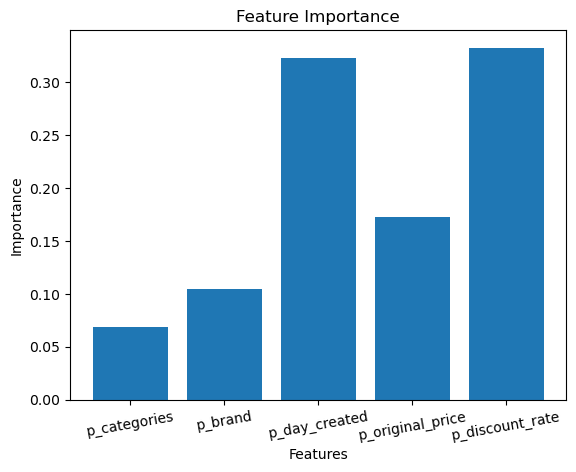

In [15]:
# plot feature importance
data_barchart = pd.DataFrame(importance, index=X.columns, columns=['Importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=10)
plt.bar(data_barchart.index, data_barchart.Importance)
plt.show()

### **Comments:**
- According to Random Forest Regressor, feature `p_day_create` and `p_discount_rate` have higher importance than other features.
- `Category feature` may be not more important than the others.